# Autism Predictor - Exploratory Data Analysis

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("M:/DataScience/data/autism_data.csv")
df.head()


,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,0,0,0,0,0,0,1,1,0,...,Yes,Yes,1,Yes,F,middle eastern,Yes,No,Family Member,No
1,2,1,1,0,0,0,1,1,0,0,...,Yes,Yes,2,Yes,M,White European,Yes,No,Family Member,Yes
2,3,1,0,0,0,0,0,1,1,0,...,Yes,Yes,4,Yes,M,Middle Eastern,Yes,No,Family Member,Yes
3,4,1,1,1,1,1,1,1,1,1,...,Yes,Yes,2,Yes,M,Hispanic,No,No,Family Member,Yes
4,5,1,1,0,1,1,1,1,1,1,...,Yes,Yes,1,Yes,F,White European,No,No,Family Member,Yes


In [5]:

# Dataset shape and info
print("Shape:", df.shape)
df.info()


Shape: (1985, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 28 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   CASE_NO_PATIENT'S                                   1985 non-null   int64  
 1   A1                                                  1985 non-null   int64  
 2   A2                                                  1985 non-null   int64  
 3   A3                                                  1985 non-null   int64  
 4   A4                                                  1985 non-null   int64  
 5   A5                                                  1985 non-null   int64  
 6   A6                                                  1985 non-null   int64  
 7   A7                                                  1985 non-null   int64  
 8   A8                                                  1985 non

In [6]:

# Convert Yes/No columns to 1/0
for col in df.columns:
    if df[col].dtype == object:
        unique_vals = set(str(v).strip().lower() for v in df[col].dropna().unique())
        if unique_vals <= {"yes", "no"}:
            df[col] = df[col].str.strip().str.lower().map({"yes": 1, "no": 0})
df.head()


,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,0,0,0,0,0,0,1,1,0,...,1,1.0,1,1,F,middle eastern,1,0,Family Member,0
1,2,1,1,0,0,0,1,1,0,0,...,1,1.0,2,1,M,White European,1,0,Family Member,1
2,3,1,0,0,0,0,0,1,1,0,...,1,1.0,4,1,M,Middle Eastern,1,0,Family Member,1
3,4,1,1,1,1,1,1,1,1,1,...,1,1.0,2,1,M,Hispanic,0,0,Family Member,1
4,5,1,1,0,1,1,1,1,1,1,...,1,1.0,1,1,F,White European,0,0,Family Member,1


In [9]:

from sklearn.preprocessing import LabelEncoder

cat_cols = ["Sex", "Ethnicity", "Who_completed_the_test"]
for col in cat_cols:
    if col in df.columns:
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

df.head()


,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,0,0,0,0,0,0,1,1,0,...,1,1.0,1,1,0,13,1,0,0,0
1,2,1,1,0,0,0,1,1,0,0,...,1,1.0,2,1,1,10,1,0,0,1
2,3,1,0,0,0,0,0,1,1,0,...,1,1.0,4,1,1,4,1,0,0,1
3,4,1,1,1,1,1,1,1,1,1,...,1,1.0,2,1,1,2,0,0,0,1
4,5,1,1,0,1,1,1,1,1,1,...,1,1.0,1,1,0,10,0,0,0,1


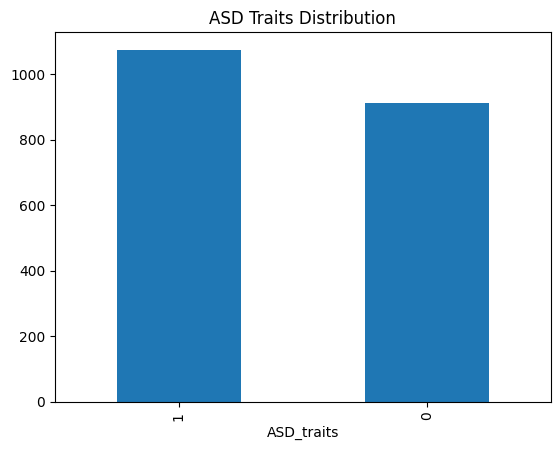

In [10]:

# Distribution of ASD traits
df['ASD_traits'].value_counts().plot(kind='bar', title='ASD Traits Distribution')
plt.show()


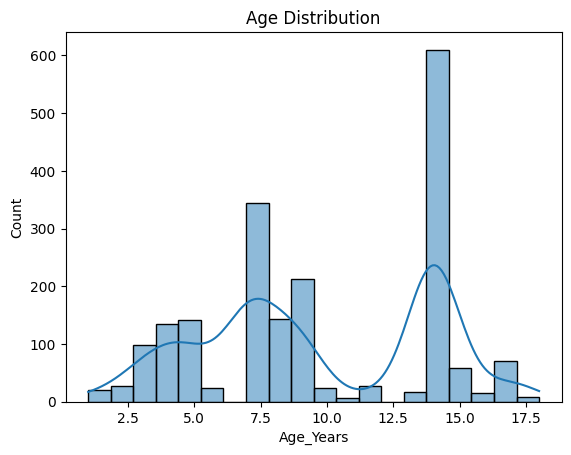

In [11]:

# Age distribution
sns.histplot(df['Age_Years'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()


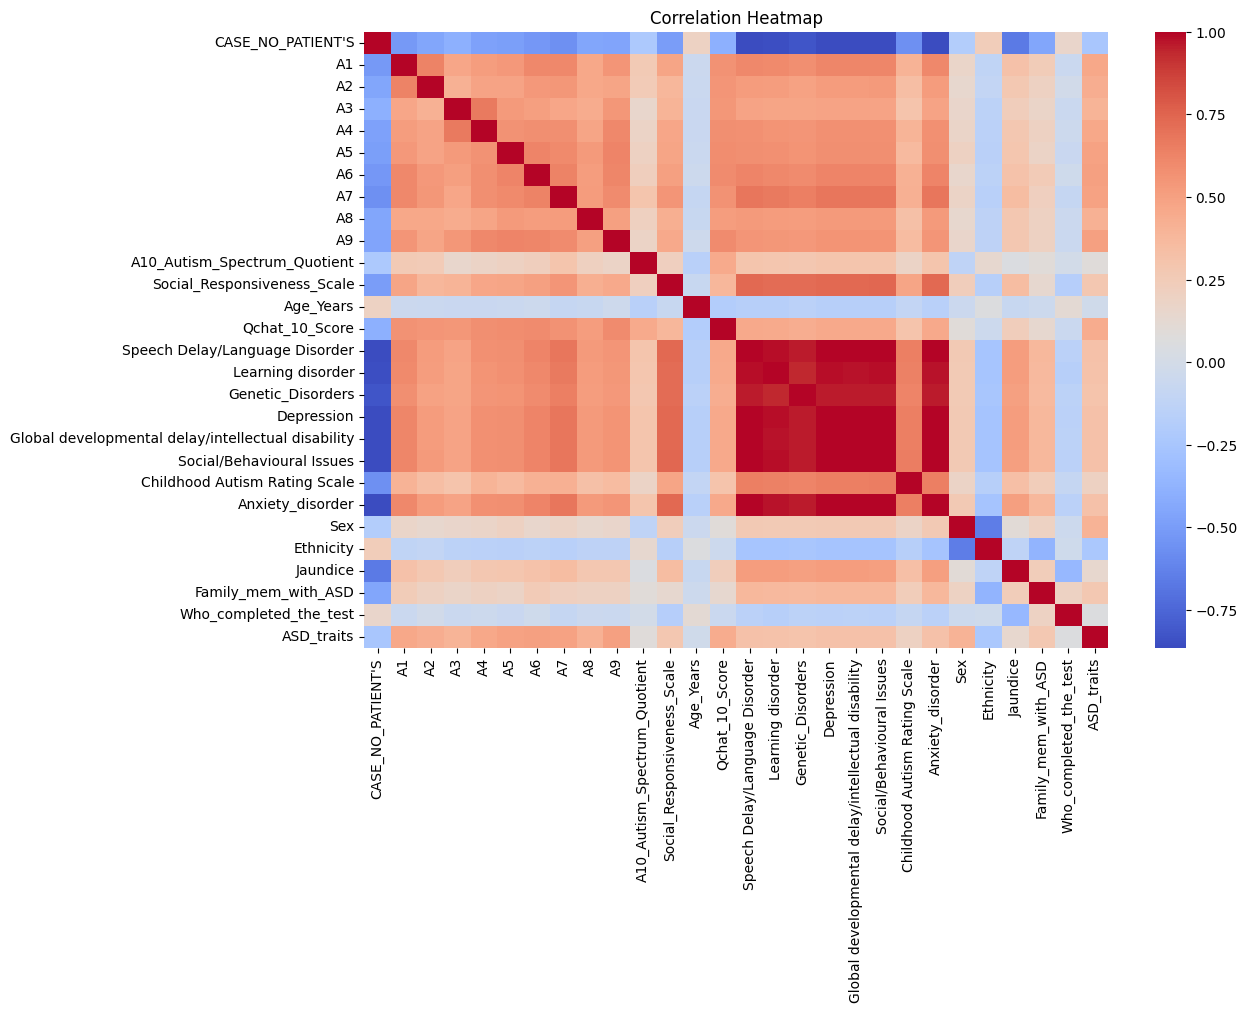

In [12]:

# Correlation heatmap (numeric features only)
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


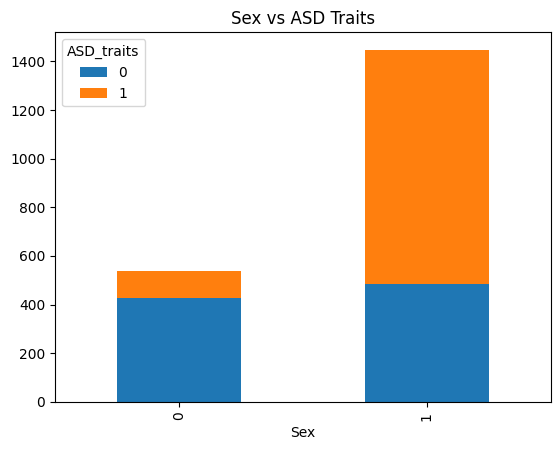

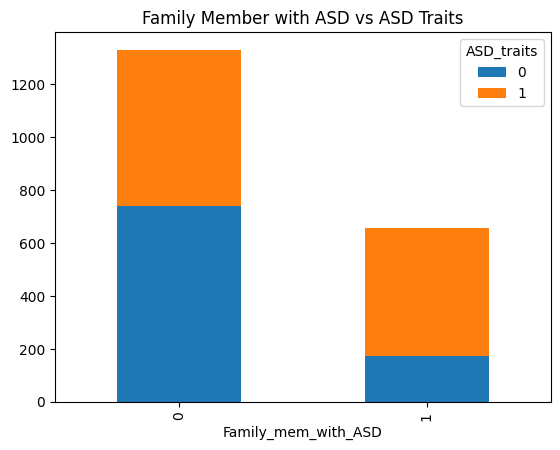

In [13]:

# Bar plot: Sex vs ASD Traits
pd.crosstab(df['Sex'], df['ASD_traits']).plot(kind='bar', stacked=True)
plt.title('Sex vs ASD Traits')
plt.show()

# Bar plot: Family history vs ASD Traits
if 'Family_mem_with_ASD' in df.columns:
    pd.crosstab(df['Family_mem_with_ASD'], df['ASD_traits']).plot(kind='bar', stacked=True)
    plt.title('Family Member with ASD vs ASD Traits')
    plt.show()
